In [1]:
#Task 1: write the base code for the optical model
import finesse
model = finesse.Model()
model.parse(
    """
laser l1 P=1 phase=0
mirror m1 R=0.85 T=0.15
mirror m2 R=0.85 T=0.15
space s1 l1.p1 m1.p1 L=0.1
s CAV m1.p2 m2.p1 L=3000
"""
)

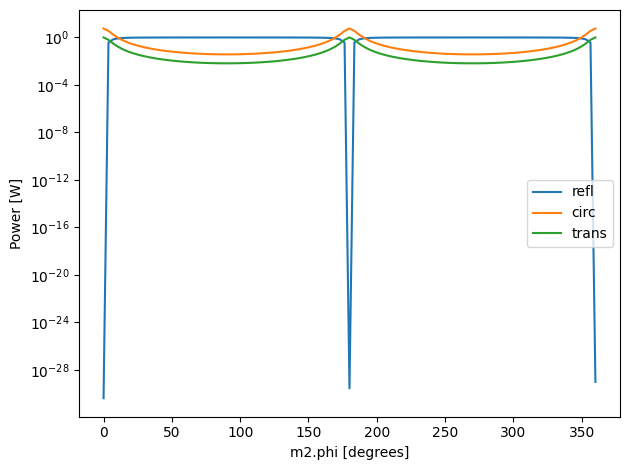

In [2]:
#Task 2: add the three photodiodes & simulate the response of the cavity as the tuning of M2 is varied.
import finesse
model = finesse.Model()
model.parse(
    """
laser l1 P=1 phase=0
mirror m1 R=0.85 T=0.15
mirror m2 R=0.85 T=0.15
space s1 l1.p1 m1.p1 L=0.1
s CAV m1.p2 m2.p1 L=3000
pd refl m1.p1.o
pd circ m1.p2.i
pd trans m2.p2.o
xaxis(m2.phi,lin,0,360,100)
"""
)
out = model.run()
out.plot(logy=True);

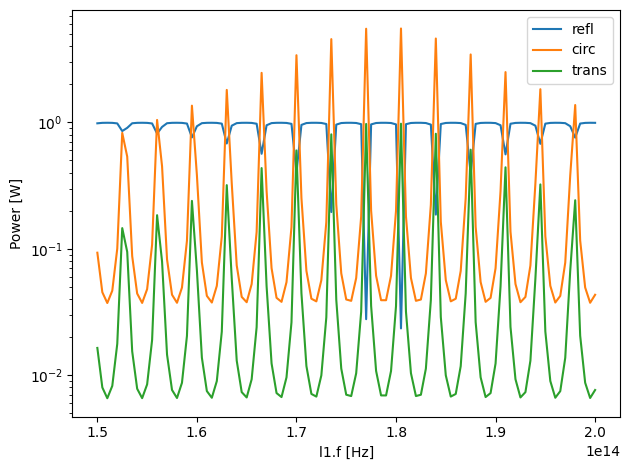

In [3]:
#Task 3: simulate the response of the cavity as the laser frequency is varied
import finesse
model = finesse.Model()
model.parse(
    """
laser l1 P=1 phase=0
mirror m1 R=0.85 T=0.15
mirror m2 R=0.85 T=0.15
space s1 l1.p1 m1.p1 L=0.1
s CAV m1.p2 m2.p1 L=3000
pd refl m1.p1.o
pd circ m1.p2.i
pd trans m2.p2.o
xaxis(l1.f,lin,1.5e14,2e14,100)
"""
)
out = model.run()
out.plot(logy=True);

In [6]:
import finesse
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks_cwt

# Initialize Finesse model
model = finesse.Model()

# Define the Finesse code
finesse.parse( 
    """
laser l1 P=1 phase=0
mirror m1 R=0.85 T=0.15
mirror m2 R=0.85 T=0.15
space s1 l1.p1 m1.p1 L=0.1
s CAV m1.p2 m2.p1 L=3000
pd refl m1.p1.o
pd circ m1.p2.i
pd trans m2.p2.o
xaxis(l1.f,lin,1.5e14,2e14,100)
"""
)
out = model.run()
out.plot(logy=True)

# Extract relevant data from the simulation output
x_values = out.x
circ_values = out["circ"]



 # Extract resonant frequencies using find_peaks_cwt
   peaks = find_peaks_cwt(out["circ"], np.arange(1, 10))
    peak_frequencies = out.x[peaks]

    # Calculate the Free Spectral Range (FSR)
    fsr = np.diff(peak_frequencies)
    average_fsr = np.mean(fsr)

    print("Resonant Frequencies (Hz):", peak_frequencies)
    print("Free Spectral Range (FSR) (Hz):", fsr)
    print("Average FSR (Hz):", average_fsr)

IndentationError: unexpected indent (2310288606.py, line 33)